In [2]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#loading data
df=pd.read_csv("grades.csv")
df

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49
...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06


In [10]:
df['day'] = pd.DatetimeIndex(df['submit_time']).day
df['month'] = pd.DatetimeIndex(df['submit_time']).month
df['year'] = pd.DatetimeIndex(df['submit_time']).year
df['hour'] = pd.DatetimeIndex(df['submit_time']).hour
df['min'] = pd.DatetimeIndex(df['submit_time']).minute
df['secs'] = pd.DatetimeIndex(df['submit_time']).second
df

,submission,submit_time,year,day,month,hour,min,secs
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,2017,3,1,20,28,52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,2017,3,1,20,18,21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,2017,3,1,22,37,8
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,2017,2,1,21,43,19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,2017,3,1,15,27,49
...,...,...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12,2017,3,1,22,43,12
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34,2017,9,1,23,59,34
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13,2016,19,12,21,44,13
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06,2017,9,1,23,23,6


In [19]:
df['haszip'] = df['submission'].str.contains('.zip').astype(int)
df['hasR'] = df['submission'].str.contains('R').astype(int)
df
df.to_csv('grades_cleaned.csv', index=False)

In [18]:
perc = df[df['haszip']==1].count()
perc = (189/198)*100
perc

95.45454545454545

In [56]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['submit_time'], format='%m/%d/%y-%H:%M:%S')

# Define your condition
target_date = pd.to_datetime('01/03/17-23:59:59', format='%m/%d/%y-%H:%M:%S')

# Check if 'Date' is greater than or equal to your target date
df['IsTargetDateOrLater'] = df['Date'] >= target_date
df

,submission,submit_time,year,day,month,hour,min,secs,zip,haszip,hasR,Date,IsTargetDateOrLater
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,2017,3,1,20,28,52,True,1,0,2017-01-03 20:28:52,False
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,2017,3,1,20,18,21,True,1,0,2017-01-03 20:18:21,False
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,2017,3,1,22,37,8,True,1,0,2017-01-03 22:37:08,False
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,2017,2,1,21,43,19,True,1,0,2017-01-02 21:43:19,False
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,2017,3,1,15,27,49,True,1,0,2017-01-03 15:27:49,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12,2017,3,1,22,43,12,True,1,0,2017-01-03 22:43:12,False
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34,2017,9,1,23,59,34,True,1,0,2017-01-09 23:59:34,True
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13,2016,19,12,21,44,13,True,1,0,2016-12-19 21:44:13,False
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06,2017,9,1,23,23,6,False,0,1,2017-01-09 23:23:06,True


In [58]:
df['IsTargetDateOrLater'].value_counts()

False    154
True      44
Name: IsTargetDateOrLater, dtype: int64

In [64]:
df['Date1'] = pd.to_datetime(df["Date"]).dt.date
df['day'].value_counts()

3     121
9      21
2      14
4      12
30      6
1       6
10      3
8       3
28      2
29      2
19      2
7       2
17      1
21      1
6       1
31      1
Name: day, dtype: int64

In [65]:
df

,submission,submit_time,year,day,month,hour,min,secs,zip,haszip,hasR,Date,IsTargetDateOrLater,Date1
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,2017,3,1,20,28,52,True,1,0,2017-01-03 20:28:52,False,2017-01-03
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,2017,3,1,20,18,21,True,1,0,2017-01-03 20:18:21,False,2017-01-03
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,2017,3,1,22,37,8,True,1,0,2017-01-03 22:37:08,False,2017-01-03
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,2017,2,1,21,43,19,True,1,0,2017-01-02 21:43:19,False,2017-01-02
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,2017,3,1,15,27,49,True,1,0,2017-01-03 15:27:49,False,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12,2017,3,1,22,43,12,True,1,0,2017-01-03 22:43:12,False,2017-01-03
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34,2017,9,1,23,59,34,True,1,0,2017-01-09 23:59:34,True,2017-01-09
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13,2016,19,12,21,44,13,True,1,0,2016-12-19 21:44:13,False,2016-12-19
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06,2017,9,1,23,23,6,False,0,1,2017-01-09 23:23:06,True,2017-01-09


In [66]:
df['Date1'].value_counts()

2017-01-03    120
2017-01-09     21
2017-01-02     14
2017-01-04     12
2016-12-30      6
2017-01-01      6
2017-01-08      3
2017-01-10      3
2016-12-29      2
2016-12-28      2
2017-01-07      2
2017-01-17      1
2017-02-03      1
2016-12-21      1
2017-01-06      1
2016-11-19      1
2016-12-31      1
2016-12-19      1
Name: Date1, dtype: int64

In [67]:
df['hour'].value_counts()

23    66
21    27
22    24
20    16
0     10
1      8
14     6
18     6
13     6
15     4
17     4
12     3
10     3
3      3
19     2
4      2
16     2
2      2
6      1
8      1
11     1
9      1
Name: hour, dtype: int64

<Axes: xlabel='hour'>

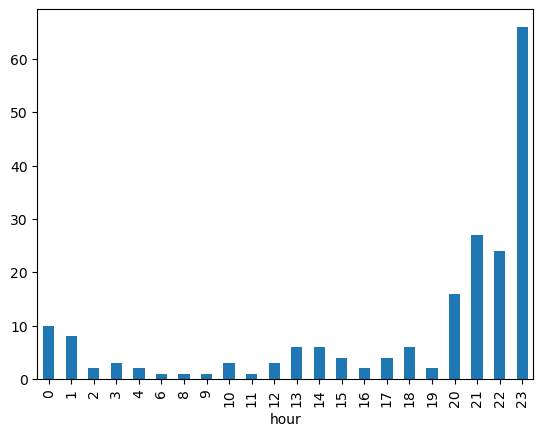

In [69]:
df.groupby('hour').size().plot(kind='bar')